In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


## Checking the Distribution of input features

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

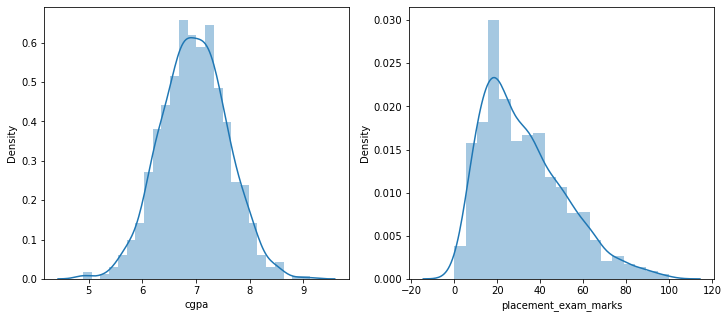

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

We will consider 'cgpa' column as it follows normal distribution.

In [8]:
#Finding the boundary values

print('Upper Bound:', df['cgpa'].mean() + 3* df['cgpa'].std())
print('Lower Bound:', df['cgpa'].mean() - 3* df['cgpa'].std())

Upper Bound: 8.808933625397177
Lower Bound: 5.113546374602842


In [9]:
df[(df['cgpa'] > 8.8) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming using Boundary values

In [10]:
new_df = df[(df['cgpa'] < 8.8) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Trimming using Z-Score

In [11]:
new_df2 = df[((df['cgpa']- df['cgpa'].mean())/df['cgpa'].std() < 3) & 
         ((df['cgpa']- df['cgpa'].mean())/df['cgpa'].std() > -3)]
new_df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Capping

In [12]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

print(upper_limit)
print(lower_limit)

8.808933625397177
5.113546374602842


In [13]:
df['cgpa'] = np.where(df['cgpa'] > upper_limit,
                      upper_limit,np.where(
                          df['cgpa']<lower_limit,
                          lower_limit, 
                          df['cgpa'])
                     )

In [15]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

<AxesSubplot:xlabel='cgpa', ylabel='Density'>

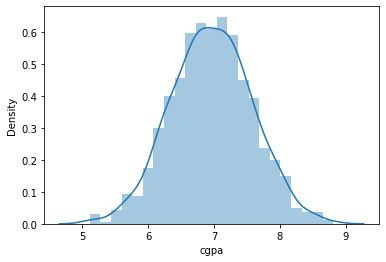

In [16]:
sns.distplot(df['cgpa'])